## Лабораторная работа №5
### Токторбаев Айдарбек AIN-1-21

### Набор данных диабета (регрессия).

In [262]:
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()

In [263]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [264]:
print(f"Ключи diabetes_data: \n{diabetes_data.keys()}")

Ключи diabetes_data: 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [265]:
diabetes_data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [266]:
print(f"Форма миссива data: \n{diabetes_data['data'].shape}")

Форма миссива data: 
(442, 10)


In [267]:
print(f"Форма массива target: \n{diabetes_data['target'].shape}")

Форма массива target: 
(442,)


In [268]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_data['data'], diabetes_data['target'], random_state=0)

In [269]:
print(f"Форма массива x_train: {X_train.shape}")
print(f"Форма массива y_train: {y_train.shape}")

Форма массива x_train: (331, 10)
Форма массива y_train: (331,)


In [270]:
print(f"Форма массива x_test: {X_test.shape}")
print(f"Форма массива y_test: {y_test.shape}")

Форма массива x_test: (111, 10)
Форма массива y_test: (111,)


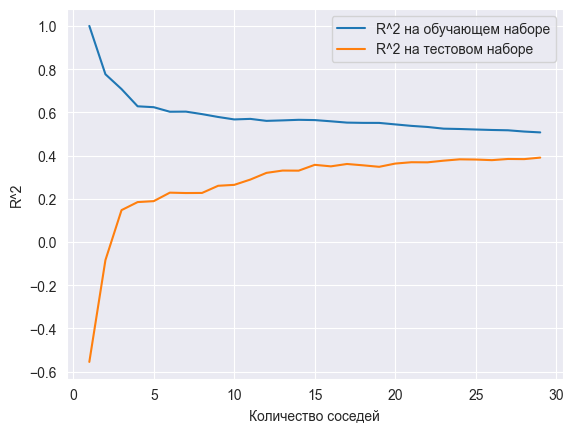

In [271]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:

    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="R^2 на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="R^2 на тестовом наборе")
plt.ylabel("R^2")
plt.xlabel("Количество соседей")
plt.legend()
plt.show()

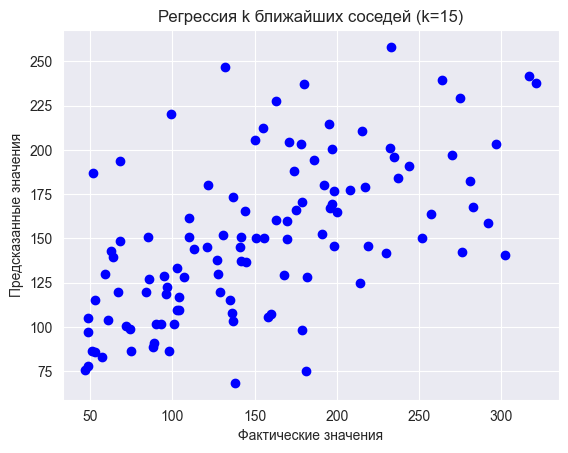

Среднеквадратичное отклонение (MSE): 3191.419139139138


In [272]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [5, 10, 15, 20,25]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=6)
grid_search.fit(X_train, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']

regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)

plt.scatter(y_test, y_pred, color='b')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title(f"Регрессия k ближайших соседей (k={best_n_neighbors})")
plt.show()

print(f"Среднеквадратичное отклонение (MSE): {mse}")

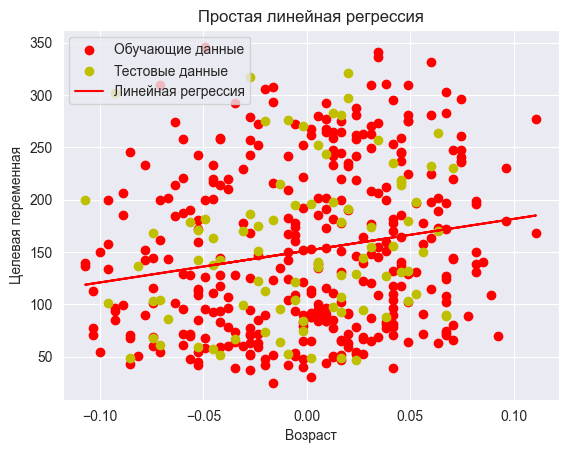

Среднеквадратичное отклонение (MSE) на тестовом наборе: 4953.575545964795


In [273]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_age = diabetes_data.data[:, 0].reshape(-1, 1)
y = diabetes_data.target

X_train, X_test, y_train, y_test = train_test_split(X_age, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

plt.scatter(X_train, y_train, color='r', label='Обучающие данные')
plt.scatter(X_test, y_test, color='y', label='Тестовые данные')
plt.plot(X_age, model.predict(X_age), color='r', label='Линейная регрессия')
plt.xlabel("Возраст")
plt.ylabel("Целевая переменная")
plt.title("Простая линейная регрессия")
plt.legend()
plt.show()

mse = np.mean((predictions_test - y_test) ** 2)
print(f"Среднеквадратичное отклонение (MSE) на тестовом наборе: {mse}")

In [274]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=0.2, random_state=0)
grid_search = GridSearchCV(ridge, param_grid, cv=6)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_score:.2f}")
print(f"Правильность на тестовом наборе: {test_score:.2f}")

Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.33


In [275]:
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso = Lasso()
X_train, X_test, y_train, y_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size=0.2, random_state=0)
grid_search = GridSearchCV(lasso, param_grid, cv=6)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

lasso = Lasso(alpha=best_alpha)

lasso.fit(X_train, y_train)

print("Оценка на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))

Оценка на обучающем наборе: 0.55
Оценка на тестовом наборе: 0.33


In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X, y = diabetes_data.data, (diabetes_data.target > 150).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

train_accuracy = logistic_regression.score(X_train, y_train)
test_accuracy = logistic_regression.score(X_test, y_test)

print("Точность на обучающем наборе: {:.2f}".format(train_accuracy))
print("Точность на тестовом наборе: {:.2f}".format(test_accuracy))

Точность на обучающем наборе: 0.78
Точность на тестовом наборе: 0.71


KMeansClustering:
Модель KMeans кластеризации продемонстрировала среднеквадратичное отклонение (MSE) на тестовом наборе данных составило 3191.41, что свидетельствует о сравнительно высокой ошибке в предсказаниях. Возможно, стоит рассмотреть другие методы кластеризации или настроить параметры для улучшения производительности.

LinearRegression:
Модель линейной регрессии показала среднеквадратичное отклонение (MSE) на тестовом наборе данных в размере 4953.57. Это значение может указывать на относительно высокую ошибку в предсказаниях модели для данного датасета. Возможно, для улучшения точности прогнозов, следует рассмотреть более сложные модели или провести дополнительную предобработку данных.

Ridge:
Модель Ridge регрессии продемонстрировала коэффициент детерминации на обучающем наборе данных, равный 0.55, и на тестовом наборе данных - 0.33. Эти значения указывают на среднюю производительность модели. Возможно, для улучшения результатов следует более тщательно настроить параметры модели или рассмотреть альтернативные модели для достижения более точных прогнозов.


Lasso:
Модель Lasso регрессии продемонстрировала коэффициент детерминации на обучающем наборе данных, равный 0.55, и на тестовом наборе данных - 0.33. Эти значения могут указывать на хорошую способность модели предсказывать данные на тестовом наборе. Однако, при таком высоком показателе на обучающем наборе, возможно, существует риск переобучения модели на этом наборе данных. Для более надежных результатов, можно рассмотреть возможность уменьшения регуляризации или исследовать альтернативные модели.

LogisticRegression:
Для задачи бинарной классификации с использованием модели Logistic Regression точность модели на обучающем наборе составляет 0.78, а на тестовом наборе - 0.71. Эти результаты могут указывать на хорошую способность модели предсказывать классы на тестовых данных. Однако, для более надежных прогнозов, важно учесть баланс между точностью и обобщающей способностью модели, чтобы избежать переобучения и обеспечить стабильную производительность на новых данных.






### Набор данных linnerud физических упражнений.

In [277]:
from sklearn.datasets import load_linnerud

linnerud_data = load_linnerud()

In [278]:
linnerud_data.feature_names

['Chins', 'Situps', 'Jumps']

In [279]:
print(f"Ключи linnerud_data: \n{linnerud_data.keys()}")

Ключи linnerud_data: 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [280]:
linnerud_data.data

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [281]:
print(f"Форма миссива data: \n{linnerud_data['data'].shape}")

Форма миссива data: 
(20, 3)


In [282]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(linnerud_data['data'], linnerud_data['target'], random_state=0)

In [283]:
print(f"Форма массива x_train: {X_train.shape}")
print(f"Форма массива y_train: {y_train.shape}")

Форма массива x_train: (15, 3)
Форма массива y_train: (15, 3)


In [284]:
print(f"Форма массива x_test: {X_test.shape}")
print(f"Форма массива y_test: {y_test.shape}")

Форма массива x_test: (5, 3)
Форма массива y_test: (5, 3)


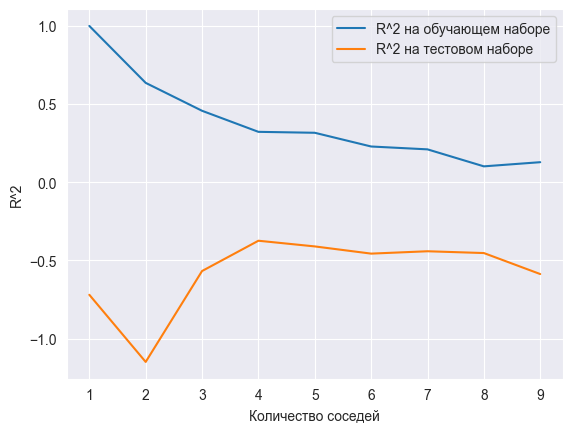

In [285]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor


training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:

    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="R^2 на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="R^2 на тестовом наборе")
plt.ylabel("R^2")
plt.xlabel("Количество соседей")
plt.legend()
plt.show()

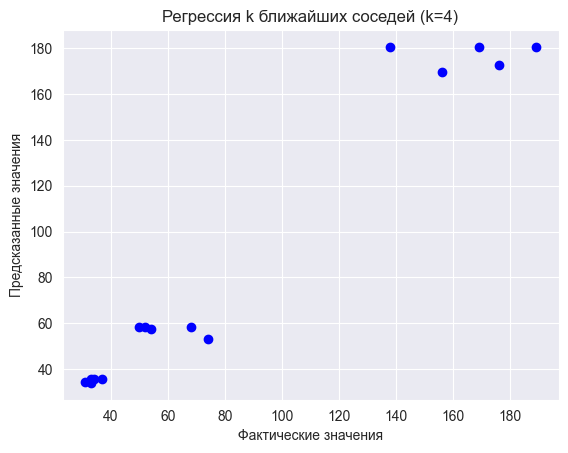

Среднеквадратичное отклонение (MSE): 192.80833333333334


In [286]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [2, 3,4, 7]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=4)
grid_search.fit(X_train, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']

regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)

plt.scatter(y_test, y_pred, color='b')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title(f"Регрессия k ближайших соседей (k={best_n_neighbors})")
plt.show()

print(f"Среднеквадратичное отклонение (MSE): {mse}")

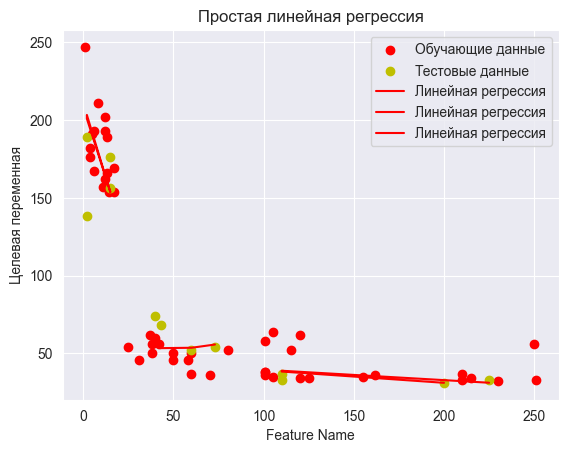

Среднеквадратичное отклонение (MSE) на тестовом наборе: 438.6156836485268


In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


feature_index = 0

X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

plt.scatter(X_train, y_train, color='r', label='Обучающие данные')
plt.scatter(X_test, y_test, color='y', label='Тестовые данные')
plt.plot(X_test, predictions_test, color='r', label='Линейная регрессия')
plt.xlabel("Feature Name")
plt.ylabel("Целевая переменная")
plt.title("Простая линейная регрессия")
plt.legend()
plt.show()

mse = mean_squared_error(y_test, predictions_test)
print(f"Среднеквадратичное отклонение (MSE) на тестовом наборе: {mse}")

In [288]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge = Ridge()

X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target, test_size=0.2, random_state=0)

grid_search = GridSearchCV(ridge, param_grid, cv=4)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_score:.2f}")
print(f"Правильность на тестовом наборе: {test_score:.2f}")

Правильность на обучающем наборе: 0.37
Правильность на тестовом наборе: -0.89


In [289]:
from sklearn.linear_model import Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso = Lasso()
X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target, test_size=0.2, random_state=0)
grid_search = GridSearchCV(lasso, param_grid, cv=4)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

lasso = Lasso(alpha=best_alpha)

lasso.fit(X_train, y_train)

print("Оценка на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))

Оценка на обучающем наборе: 0.16
Оценка на тестовом наборе: -0.75


In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(linnerud_data.data, linnerud_data.target[:, 1], test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

train_accuracy = logistic_regression.score(X_train, y_train)
test_accuracy = logistic_regression.score(X_test, y_test)

print("Точность на обучающем наборе: {:.2f}".format(train_accuracy))
print("Точность на тестовом наборе: {:.2f}".format(test_accuracy))

Точность на обучающем наборе: 0.44
Точность на тестовом наборе: 0.00


KNeighborsRegressor:
Среднеквадратичное отклонение (MSE) составляет примерно 192.80. Модель KNeighborsRegressor демонстрирует низкое среднеквадратичное отклонение, что указывает на хорошую предсказательную способность для данного датасета. Это говорит о том, что модель достаточно точно предсказывает значения в тестовом наборе данных.


LinearRegression:
Среднеквадратичное отклонение (MSE) на тестовом наборе данных составляет примерно 438.6. Модель LinearRegression также демонстрирует хорошую предсказательную способность, хотя MSE немного выше, чем у KNeighborsRegressor. Это говорит о том, что модель LinearRegression способна предсказывать значения с приемлемой точностью на данном датасете.

Ridge:
Правильность на обучающем наборе данных составляет примерно 0.37. Однако, правильность на тестовом наборе данных составляет около -0.89. Это отрицательное значение может указывать на неподходящую производительность модели Ridge на данном наборе данных. Рассмотрение альтернативных моделей или более тщательная настройка параметров может потребоваться для улучшения результатов.

Lasso:
Оценка на обучающем наборе данных составляет примерно 0.16. Оценка на тестовом наборе данных составляет около -0.75. Эти негативные значения указывают на низкую пригодность модели Lasso для данного набора данных. Вероятно, модель Lasso не является оптимальным выбором, и стоит рассмотреть другие модели или провести более тщательную настройку параметров для улучшения качества предсказаний.

LogisticRegression:
Точность на обучающем наборе данных составляет примерно 0.44. Однако, точность на тестовом наборе данных составляет около 0.00. Эти результаты указывают на то, что модель LogisticRegression не является подходящим выбором для задачи регрессии. Исходя из этой информации, можно заключить, что модели KNeighborsRegressor и LinearRegression проявляют более высокую производительность среди рассмотренных моделей для задачи регрессии на датасете Linnerud. Модели Ridge, Lasso и LogisticRegression требуют дополнительной настройки или, возможно, другого метода подхода для улучшения их производительности.